In [ ]:
!pip install tensorflow logomaker networkx

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
from learnMSA import msa_hmm
from matplotlib import pyplot as plt

## MSA HMM Interactive

1. Fit n models, keep the best and align
2. Compare to a reference
3. Visualize the HMM

Change the variables in the following cell to fit your needs.

In [5]:
# your fasta file with unaligned sequences
train_filename = "../MSA-HMM-Analysis/data/homfam/train/phc.fasta"

# reference file with aligned sequences that have matching IDs to seqs in the train_file
# replace with empty string if no reference is available
ref_filename = "../MSA-HMM-Analysis/data/homfam/refs/phc.ref"

# number of independently trained models
num_runs = 1

## Training

In [6]:
# load the file
fasta_file = msa_hmm.fasta.Fasta(train_filename)  
# optionally load the reference and find the corresponding sequences in the train file
if ref_filename != "":
    ref_fasta = msa_hmm.fasta.Fasta(ref_filename, aligned=True)
    subset = np.array([fasta_file.seq_ids.index(sid) for sid in ref_fasta.seq_ids])
else:
    subset = None
results = msa_hmm.align.fit_and_align_n(fasta_file, 
                                        num_runs=num_runs,
                                        config=msa_hmm.config.default,
                                        subset=subset)
best = np.argmax([ll for ll,_ in results])
best_ll, best_alignment = results[best]
print("Computed alignments with likelihoods:", ["%.4f" % ll for ll,_ in results])
print("Best model has likelihood:", "%.4f" % best_ll)
out_filepath = "test/data/interactive.alignment.fasta"
best_alignment.to_file(out_filepath)
if ref_filename != "":
    out_file = msa_hmm.fasta.Fasta(out_filepath, aligned=True) 
    _,r = out_file.precision_recall(ref_fasta)
    print("SP score =", "%.4f" % r)

TypeError: fit_and_align_n() got multiple values for argument 'num_runs'

## Alignment

In [4]:
# print the alignment
max_seq = 20
msa = best_alignment.to_string()
for s in msa[:max_seq]:
    print(s)
if len(msa) > max_seq:
    print(len(msa) - max_seq, "sequences omitted.")

..vdgdq$CESN...PCLNGGSC..K...D...DIN..S..YECWCPFGFEGKN$cel....................
..kdgdq$CEGH...PCLNQGHC..K...D...GIG..D..YTCTCAEGFEGKN$cefstr.................
.....qv$PSNC...DCLNGGTC..V...SnkyFSN..I..HWCNCPKKFGGQH$ceidk..................
....tas$CQDM...SCSKQGEC..L...E...TIG..N..YTCSCYPGFYGPE$ceyvre.................
......a$CTNT...SCSGHGEC..V...E...TIN..N..YTCKCDPGFSGLK$ceqiv..................
gtshlvk$CAEKektFCVNGGEC..FmvkD...LSNpsR..YLCKCQPGFTGAR$ctenvpmkvqnqekaeelyqk..
..nsypg$CPSSydgYCLNGGVCmhI...E...SLD..S..YTCNCVIGYSGDR$cqtrdlrwwelr...........
vvshfnd$CPDShtqFCFH-GTC..R...F...LVQ..EdkPACVCHSGYVGAR$cehadlla...............
.......$CSLD...NGDCDQFC..H...E...EQN..S..VVCSCARGYTLAD$ngkaciptgpypcgkqtler...
....gdq$CASS...PCQNGGSC..K...D...QLQ..S..YICFCLPAFEGRN$cethkd.................
...dqli$CVNE...NGGCEQYC..S...D...HTG..Tk.RSCRCHEGYSLLA$dgvsctptveypcgkipile...
.....mt$CNIK...NGRCEQFC..K...N...SAD..Nk.VVCSCTEGYRLAE$nqkscepavpfpcgrvsvsqtsk


## Plot the consensus sequence logo of the trained model

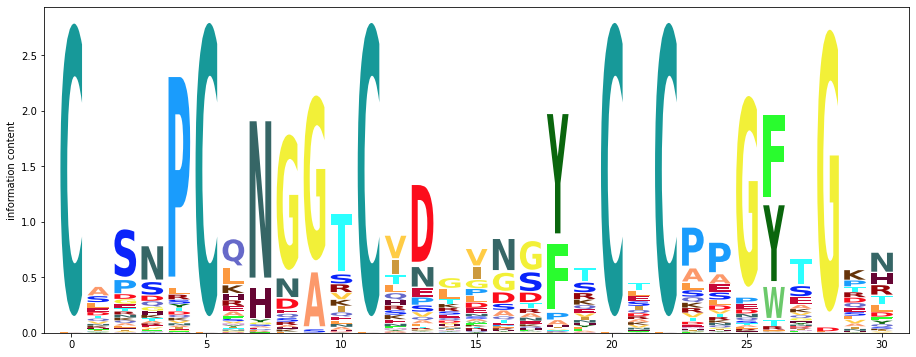

In [5]:
fig, ax = plt.subplots()
msa_hmm.vis.make_logo(best_alignment, ax)

## Plot the HMM plus a hidden sequence 

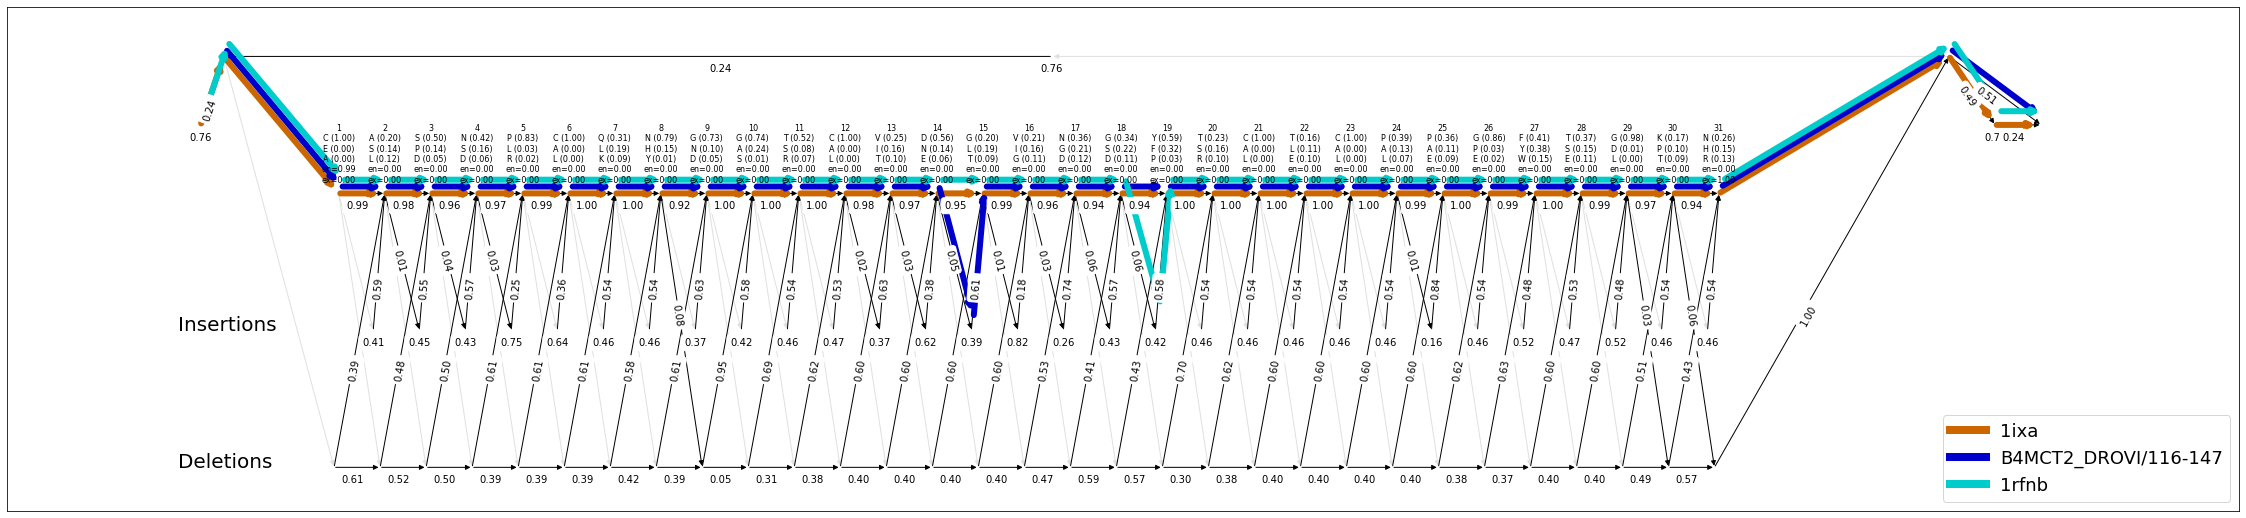

In [7]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
msa_hmm.vis.plot_hmm(best_alignment, ax, 
         seq_indices=[best_alignment.indices[0], 11, best_alignment.indices[-1]],
         path_colors=["#CC6600", "#0000cc", "#00cccc"])  #full domain length
plt.savefig("bowman_viterbi.pdf", bbox_inches='tight') 